### 👉 Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

### 👉 Utility functions 🔨

In [2]:
def to_vec(x):
    a = np.zeros([10,1])
    a[int(x)] = 1.0
    return a
def sig(x):
    return 1/(1 + np.exp(-x))
def arcsig(x):
    return -np.log(1/x - 1)

### 👉 Load data 📊

In [3]:
data = []
with open('images\\mnist_train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        try:
            label = np.float64(row.pop(0))
            image = np.array([row], dtype=np.float64).T
            data.append({
                "label": to_vec(label),
                "image": image/255
            })
        except:
            print("except")
            continue;

except


### 👉 Setup neural network🧠

In [143]:
import importlib
import network
importlib.reload(network);

In [144]:
net = network.network([784, 16, 16, 10])

## 👉 Train❗

In [145]:
params = net.grad_descent(data, repeat=1000, batch_size=1024, learning_rate=0.01)

👉 Batch  111999 / 111999 
[🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩]


### 👉 Check success rate ✔

In [174]:
success_num = 0
for item in data:
    image   = item['image']
    label   = item['label']
    
    result  = net.run_u(image)
    
    res_num = np.argmax(result)
    lbl_num = np.argmax(label)
    if res_num==lbl_num:
        success_num += 1
print(f'✅ Correct:      {suc} times\n❌ Wrong:        {rep-suc} times.\n📈 Sucsses rate: {str((suc/rep)*100)[:5]}%')

✅ Correct:      42370 times
❌ Wrong:        17630 times.
📈 Sucsses rate: 70.61%


### 👉 Results examples

👉 Guessed: 3 ❗
👉 Correct: 3 ❗

🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩
🟩🟩🟩  YOU GOT IT RIGHT💖  🟩🟩🟩
🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩

🎲 Percentages:
  🔹0 --> 3.53%
  🔹1 --> 14.8%
  🔹2 --> 3.17%
  🔹3 --> 82.8%
  🔹4 --> 0.66%
  🔹5 --> 16.0%
  🔹6 --> 1.33%
  🔹7 --> 1.39%
  🔹8 --> 7.93%
  🔹9 --> 0.81%

📷 Image:


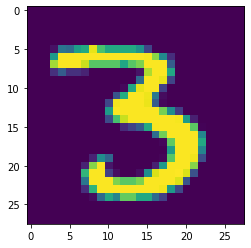

In [208]:
ind = 12

img = data[ind]['image']*255
lbl = data[ind]['label']

res = net.run_u(img)

print(f'👉 Guessed: {np.argmax(res)} ❗')
print(f'👉 Correct: {np.argmax(lbl)} ❗')

if np.abs(np.argmax(res) - np.argmax(lbl)) < 0.1:
    print('\n🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩')
    print('🟩🟩🟩  YOU GOT IT RIGHT💖  🟩🟩🟩')
    print('🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩\n')
    suc += 1
else:
    print('❌✖❌✖❌✖❌✖❌✖❌✖❌✖❌✖❌✖❌')
    print('❌✖❌✖  YOU GOT IT WRONG😥  ✖❌✖❌')
    print('❌✖❌✖❌✖❌✖❌✖❌✖❌✖❌✖❌✖❌\n')

print('🎲 Percentages:')
for i, val in enumerate(res):
    print(f'  🔹{i} --> {str(val[0]*100)[0:4]}%')
print('\n📷 Image:')
plt.imshow(np.reshape(img, [28,28]));

### 👉 Save parameters to file

**csv**

In [167]:
import csv

w = csv.writer(open("params.csv", "w"))
for key, val in params.items():
    w.writerow([key, val])

**pickle**

In [168]:
import pickle

f = open("params.pkl","wb")
pickle.dump(params,f)
f.close()